## SVM

### For all companies measure NMAPE for different lags using different columns

In [126]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from tools import create_vectors

In [128]:
VITAL_COLS = ["date_", "ticker", "close", "diffs", "bin_2", "bin_3", "bin_5"]
LAGS = [3, 6, 8, 10, 16]
COMPANIES = ["amzn", "aapl", "tsla", "msft", "goog", "googl"]

In [129]:
def create_and_predict(x, y):
    tscv = TimeSeriesSplit(n_splits=4)
    regr = make_pipeline(StandardScaler(), SVC(C=1.0, kernel="linear", cache_size=1000))
    vals = cross_val_score(regr, x, y, scoring="accuracy", cv=tscv)
    return round(sum(vals) / len(vals), 4)


def measure(df, bin, lags):
    main_col = f"bin_{bin}"
    cols = [i for i in df.columns if i not in VITAL_COLS]
    results = {}

    for lag in lags:
        i = 0
        results[lag] = {}
        results[lag]["baseline"] = create_and_predict(
            *create_vectors(df, main_col=main_col, lag=lag + 1)
        )
        for col in cols:
            print(f"Lag {lag}: {i}/{len(cols)}")
            accuracy = create_and_predict(
                *create_vectors(df, main_col=main_col, cols=[col], lag=lag + 1)
            )
            results[lag][col] = (
                accuracy,
                "+" if accuracy > results[lag]["baseline"] else "-",
            )
            i += 1
    return results


def print_results(results):
    for i in results:
        print(i, results[i])


def measure_conf_matrix(x, y):
    tscv = TimeSeriesSplit(n_splits=4)
    regr = make_pipeline(StandardScaler(), SVC(C=1.0, kernel="linear", cache_size=1000))
    vals = cross_val_predict(regr, x, y, cv=tscv)
    return confusion_matrix(y, vals)

In [4]:
df = pd.read_csv("../datasets/relevant/amzn.csv", parse_dates=["date_"])

NameError: name 'pd' is not defined

In [3]:
measure_conf_matrix(*create_vectors(df, main_col="bin_2"))

NameError: name 'measure_conf_matrix' is not defined

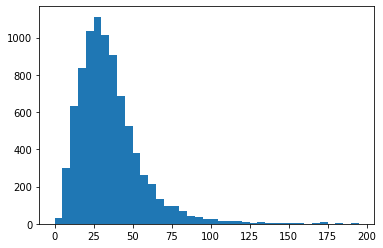

In [131]:
from matplotlib import pyplot as plt

plt.hist(df["count"], bins=[i for i in range(0, 200, 5)])
plt.show()

In [112]:
res = measure(df, 2, [3, 16])
print_results(res)

Lag 3: 0/10
Lag 3: 1/10
Lag 3: 2/10
Lag 3: 3/10
Lag 3: 4/10
Lag 3: 5/10
Lag 3: 6/10
Lag 3: 7/10
Lag 3: 8/10
Lag 3: 9/10
Lag 16: 0/10
Lag 16: 1/10
Lag 16: 2/10
Lag 16: 3/10
Lag 16: 4/10
Lag 16: 5/10
Lag 16: 6/10
Lag 16: 7/10
Lag 16: 8/10
Lag 16: 9/10
3 {'baseline': 0.5119, 'low': (0.5119, '-'), 'vol': (0.5119, '-'), 'max_pos': (0.5087, '-'), 'std_neg': (0.5119, '-'), 'std_pos': (0.5128, '+'), 'mean_comp': (0.525, '+'), 'mean_neg': (0.5392, '+'), 'mean_pos': (0.5173, '+'), 'median_comp': (0.5115, '-'), 'count': (0.5122, '+')}
16 {'baseline': 0.5105, 'low': (0.5068, '-'), 'vol': (0.5109, '+'), 'max_pos': (0.5122, '+'), 'std_neg': (0.5128, '+'), 'std_pos': (0.5108, '+'), 'mean_comp': (0.5236, '+'), 'mean_neg': (0.5278, '+'), 'mean_pos': (0.5189, '+'), 'median_comp': (0.5028, '-'), 'count': (0.5121, '+')}


In [118]:
results = {}
for company in COMPANIES:
    df = pd.read_csv(f"../datasets/relevant/{company}.csv", parse_dates=["date_"])
    results[company] = {}
    results[company][2] = create_and_predict(*create_vectors(df, main_col="bin_2"))
    results[company][3] = create_and_predict(*create_vectors(df, main_col="bin_3"))
    results[company][5] = create_and_predict(*create_vectors(df, main_col="bin_5"))

In [123]:
print_results(results)


amzn {2: 0.5119, 3: 0.5373, 5: 0.5373}
aapl {2: 0.5034, 3: 0.5745, 5: 0.5745}
tsla {2: 0.505, 3: 0.3193, 5: 0.3209}
msft {2: 0.5106, 3: 0.5712, 5: 0.5712}
goog {2: 0.5038, 3: 0.5578, 5: 0.5578}
googl {2: 0.5024, 3: 0.5493, 5: 0.5493}
